In [346]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn.preprocessing as pr 

import warnings 
warnings.filterwarnings('ignore')

In [347]:
#loading data
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [349]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [350]:
data.shape

(1338, 7)

In [351]:
data.duplicated().sum()

1

In [352]:
data = data.drop_duplicates()
data.shape

(1337, 7)

### **- Data Analysis** 

#### **1. Univariate and bivariate analysis**

In [353]:
cat_feat = data.select_dtypes(include=object)
qt_feat = data.select_dtypes(include=[int, float])
qt_feat

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


#### **1.1 Categorical data**

In [354]:
data.describe(include=object)

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [355]:
def handle_categorical_data(df, col, orient='v'):
    """
    Visualize the distribution of categorical data.
    
    Parameters:
        df (DataFrame): Input DataFrame.
        col (str): Name of the column containing categorical data.
        orient (str, optional): Orientation of the plot ('v' for vertical or 'h' for horizontal). Default is 'v'.
    
    Returns:
        plot: Seaborn bar plot object.
    """
    # Count occurrences of each category in the specified column
    value_counts = df[col].value_counts() / df[col].value_counts().sum()
    counts_df = pd.DataFrame({col: value_counts.index, 'Count': value_counts.values})
    
    # Plot the data using Seaborn barplot
    if orient == 'v':
        plot = sns.barplot(x=counts_df[col], y=counts_df['Count'], palette='viridis', orient='v')
    elif orient == 'h':
        plot = sns.barplot(x=counts_df['Count'],y=counts_df[col], palette='viridis', orient='h')

    else:
        raise ValueError("Invalid orientation. Use 'v' for vertical or 'h' for horizontal.")
    
    return plot

<Axes: xlabel='smoker', ylabel='Count'>

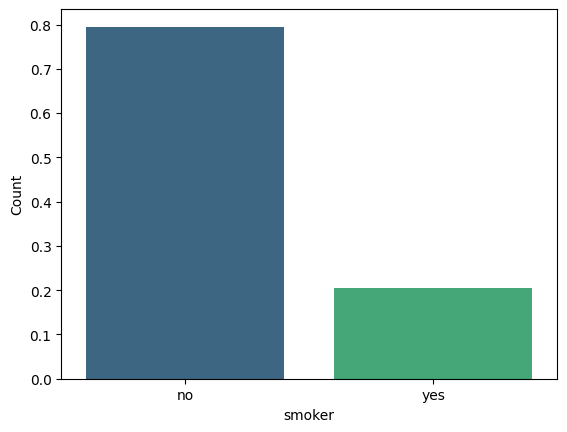

In [356]:
handle_categorical_data(data, 'smoker')

- **No smoker** people represent 80% from the population 

<Axes: xlabel='sex', ylabel='Count'>

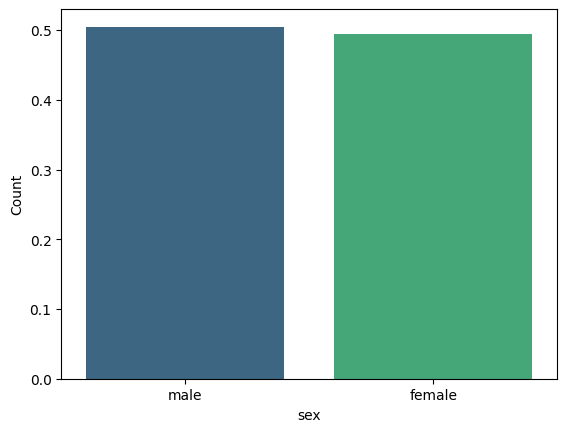

In [357]:
handle_categorical_data(data, 'sex')

- It seems like **sex** has uniform distribution which does not have an influence on data !!

<Axes: xlabel='Count', ylabel='region'>

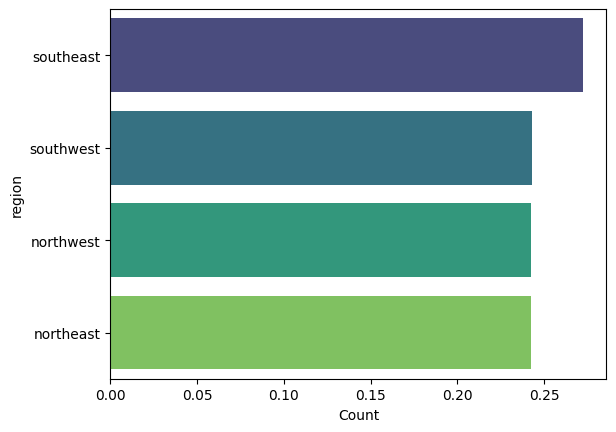

In [358]:
handle_categorical_data(data, 'region', 'h')

#### **1.2 non categorical features**

In [359]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [360]:
18+15, 33+15,48+15

(33, 48, 63)

In [361]:
import pandas as pd

# Supposons que votre DataFrame s'appelle 'df' et que la colonne d'âge est nommée 'age'
data['categorie_age'] = pd.cut(data['age'], bins=[17, 33, 48, 65], labels=['Jeune adulte', 'Adulte', 'Sénior'])
data.head()


,age,sex,bmi,children,smoker,region,charges,categorie_age
0,19,female,27.900,0,yes,southwest,16884.92400,Jeune adulte
1,18,male,33.770,1,no,southeast,1725.55230,Jeune adulte
2,28,male,33.000,3,no,southeast,4449.46200,Jeune adulte
3,33,male,22.705,0,no,northwest,21984.47061,Jeune adulte
4,32,male,28.880,0,no,northwest,3866.85520,Jeune adulte


In [362]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_histograms(df, bins=10, figsize=(12, 8), color='blue'):
    """
    Plots a grid of histograms with KDE for each numerical column in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The input data frame.
    - bins (int): Number of bins for each histogram.
    - figsize (tuple): Size of the entire figure.
    - color (str): Color of the histogram bars and KDE curve.
    """
    # Filter numeric columns only
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)
    
    # Set up the layout for subplots
    rows = int(num_columns**0.5) + (1 if num_columns**0.5 % 1 else 0)
    cols = int(num_columns / rows) + (1 if num_columns % rows else 0)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()  # Flatten for easy iteration if multi-dimensional
    
    for i, col in enumerate(numeric_columns):
        sns.histplot(
            data=df, 
            x=col, 
            bins=bins,  
            color=color, 
            ax=axes[i]
        )
        axes[i].set_title(col)
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    
    # Turn off any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



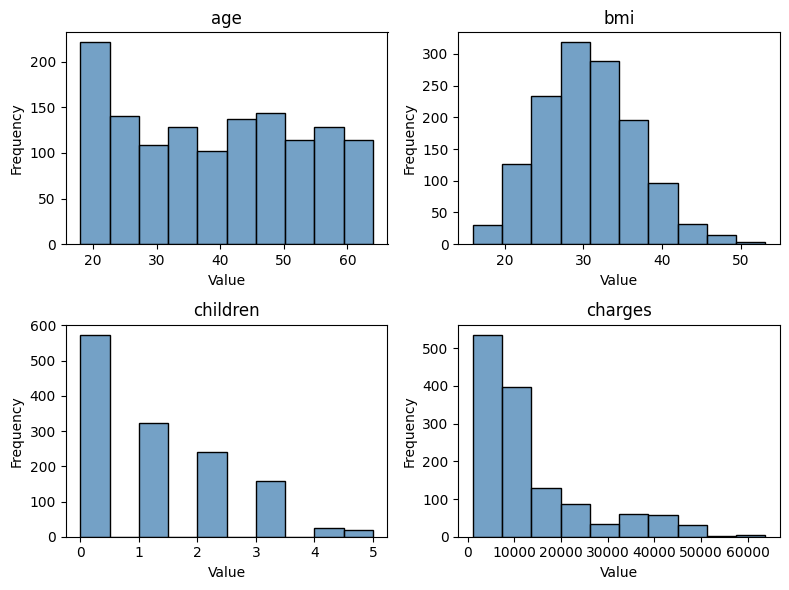

In [363]:
plot_histograms(data, figsize=(8,6), color='#4682B4')

### **2. Bivariate analysis**

In [364]:
def handle_grid(df, plt, row, col, features, orient):
    """
    Generate complex subplot for comparison purposes.
    
    Parameters:
        df (DataFrame): Input DataFrame.
        plt (function): Plotting function to map on the grid.
        row (str): Column name for row facet.
        col (str): Column name for column facet.
        features (list): List of features to plot.
        
    Returns:
        g: Seaborn FacetGrid object.
    """
    g = sns.FacetGrid(df, col=col, row=row, margin_titles=True)
    
    if orient not in ['v', 'h']:
        raise ValueError("Invalid orientation. Use 'v' for vertical or 'h' for horizontal.") 

    elif orient == 'h':
        g.map(plt, features, orient=orient)
    else:
        g.map(plt, features)
    return g


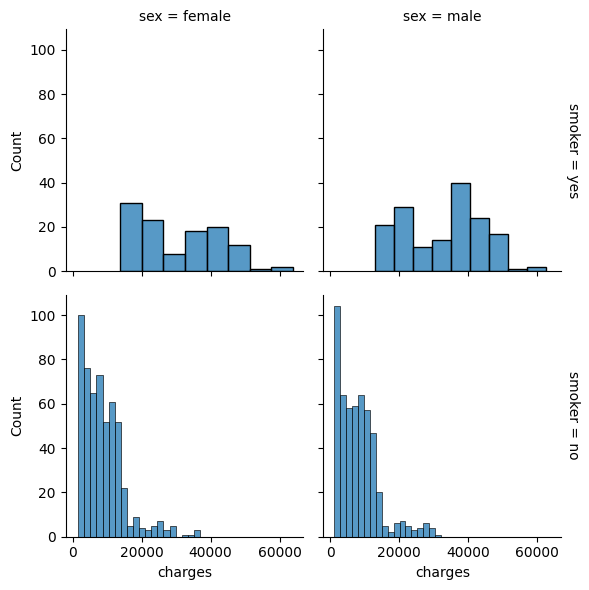

In [365]:

handle_grid(data, sns.histplot, row='smoker', col='sex', features='charges', orient='v')

- both gender make and female who they are not smoker will have low cost of medical prediction (bottom fig)
- and hight cost if they are smoker (top fig)

- as results we can say that the gender that not have strong impact on personal medical cost

<Axes: xlabel='bmi', ylabel='charges'>

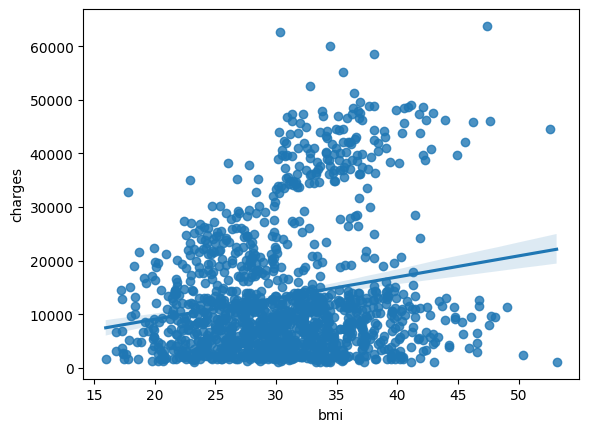

In [366]:
sns.regplot(data, x='bmi', y='charges')

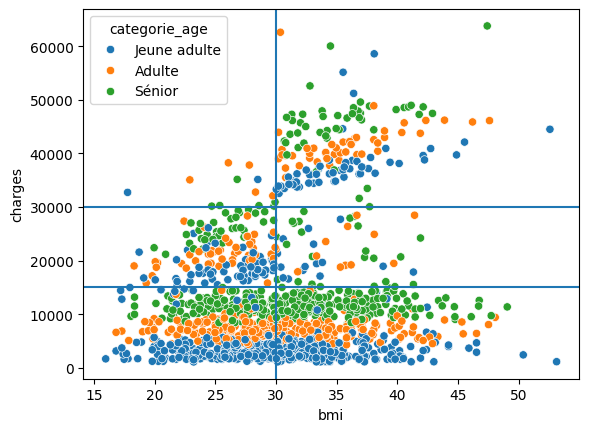

In [367]:
sns.scatterplot(data=data, x='bmi', y='charges', hue='categorie_age')
plt.axhline(30000)
plt.axhline(15000)
plt.axvline(30)

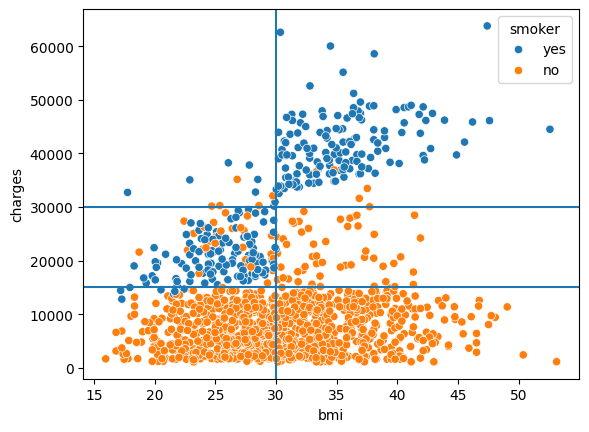

In [368]:
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker')
plt.axhline(30000)
plt.axhline(15000)
plt.axvline(30)

- from first impression we got 3 clusters :
   - smoker with high bmi 
   - smoker with low bmi 
   - no_smoker 

the question is what if we are missing another cluster (no_smoker and have bmi between 15 and 40 and with hight charges !!!!)



- Below 18.5	Underweight
- 18.5 - 24.9	Normal weight
- 25.0 - 29.9	Overweight
- 30.0 and above	Obesity


In [369]:
# Supposons que votre DataFrame s'appelle 'df'
df = data
# Supposons que votre DataFrame s'appelle 'df'
filtered_df = df[(df['smoker'] == 'no') & (df['charges'] >= 15000) & (df['charges'] <= 30000)]
filtered_df.index

Index([   3,    9,   36,   45,  102,  138,  140,  143,  159,  219,  227,  245,
        264,  289,  291,  305,  306,  321,  334,  340,  355,  378,  379,  382,
        397,  429,  430,  443,  455,  462,  468,  473,  480,  491,  516,  520,
        526,  533,  539,  554,  583,  603,  637,  644,  658,  661,  688,  696,
        754,  770,  806,  825,  858,  876,  908,  925,  959,  964,  980,  983,
        987, 1003, 1008, 1019, 1027, 1039, 1057, 1079, 1084, 1098, 1104, 1123,
       1132, 1134, 1142, 1162, 1195, 1211, 1253, 1318, 1328],
      dtype='int64')

In [370]:
data = data.drop(labels=filtered_df.index, axis=0)

data.shape

(1256, 8)

In [371]:
data.head()

,age,sex,bmi,children,smoker,region,charges,categorie_age
0,19,female,27.90,0,yes,southwest,16884.9240,Jeune adulte
1,18,male,33.77,1,no,southeast,1725.5523,Jeune adulte
2,28,male,33.00,3,no,southeast,4449.4620,Jeune adulte
4,32,male,28.88,0,no,northwest,3866.8552,Jeune adulte
5,31,female,25.74,0,no,southeast,3756.6216,Jeune adulte


<Axes: xlabel='bmi', ylabel='charges'>

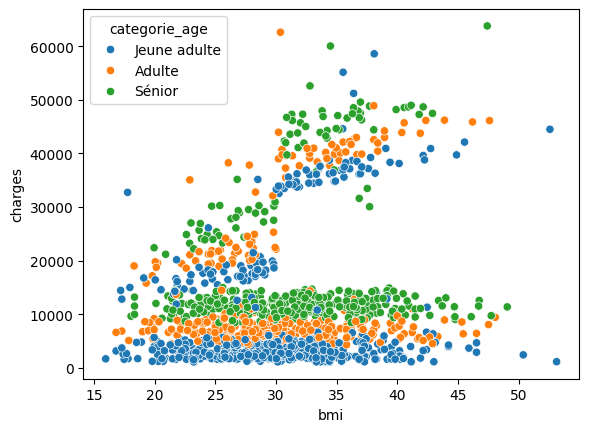

In [372]:
sns.scatterplot(data, x='bmi', y='charges', hue='categorie_age')

In [373]:
data.to_csv('ins2.csv')

<Axes: xlabel='bmi', ylabel='charges'>

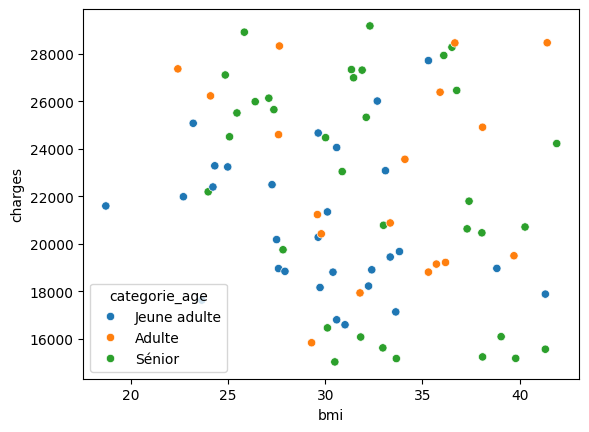

In [374]:
sns.scatterplot(filtered_df, x='bmi', y='charges', hue='categorie_age')

<Axes: xlabel='age', ylabel='charges'>

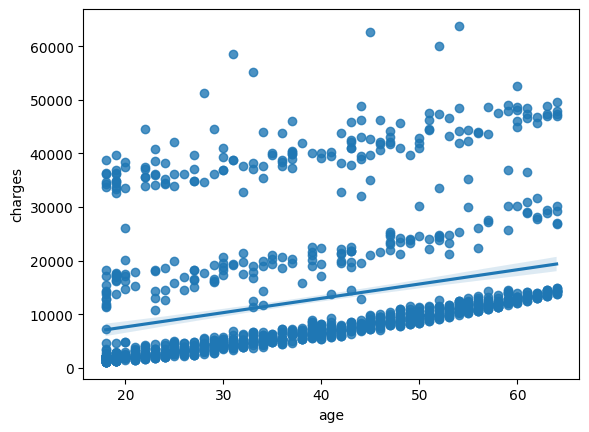

In [375]:
sns.regplot(data, x='age', y='charges')


<Axes: xlabel='age', ylabel='charges'>

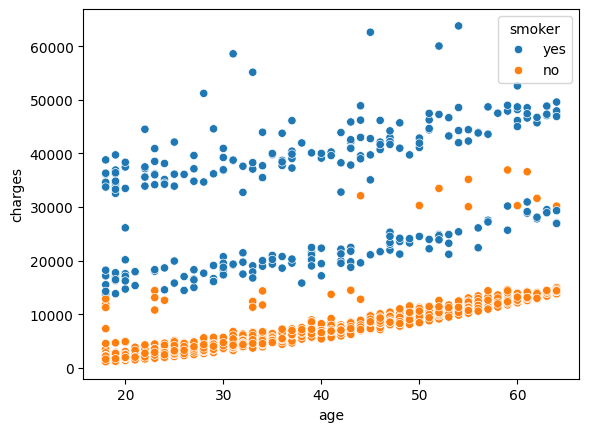

In [376]:
sns.scatterplot(data=data, x='age', y='charges', hue='smoker')

<Axes: xlabel='age', ylabel='charges'>

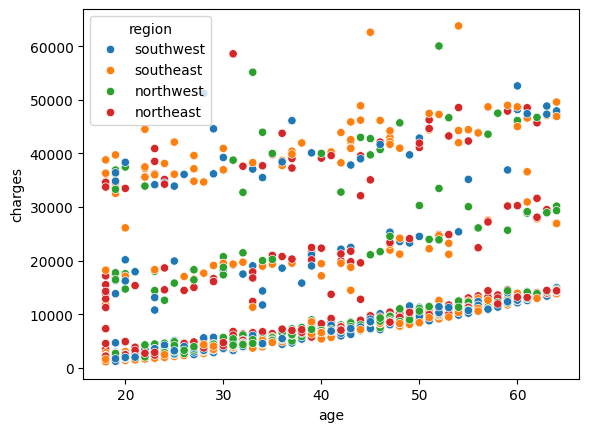

In [377]:
sns.scatterplot(data=data, x='age', y='charges', hue='region' )

- big veriation on age with small variation on charges (may have logarithmique behaviour !!!)

<Axes: xlabel='smoker', ylabel='charges'>

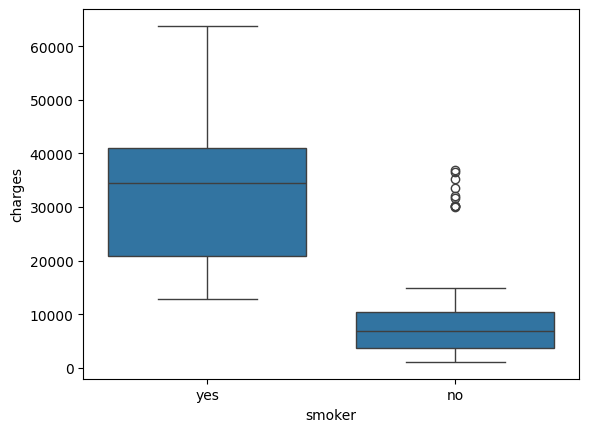

In [378]:
sns.boxplot(data=data, x='smoker', y='charges')

<Axes: xlabel='region', ylabel='charges'>

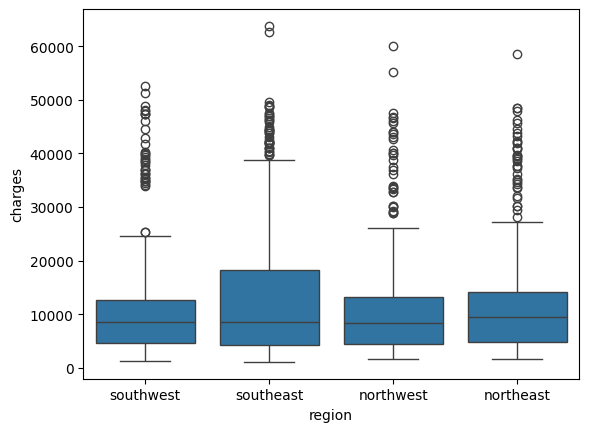

In [379]:
sns.boxplot(data=data, x='region', y='charges')

<Axes: xlabel='children', ylabel='charges'>

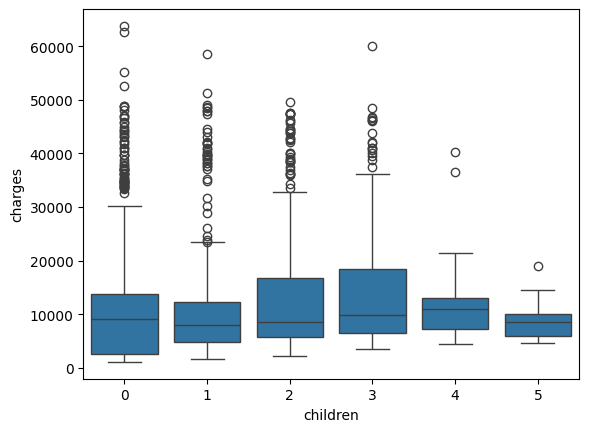

In [380]:
sns.boxplot(data=data, x='children', y='charges')

In [381]:
data_d = pd.get_dummies(data, dtype=int)
#data_d.corr()

In [382]:
import prince 

In [383]:
data_d = data = pd.read_csv('data/ins4.csv')
data_d= data_d[['charges','bmi', 'smoker_yes','smoker_no']]

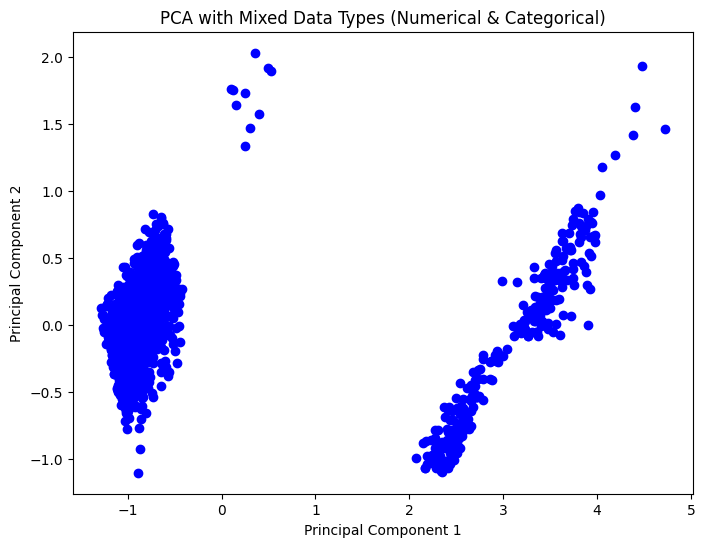

In [384]:
# Initialize Prince PCA (handles both categorical and numerical data)
pca = prince.PCA(n_components=4, random_state=42)

# Fit the PCA model on the dataset
# Note that prince automatically handles both types of features
pca.fit(data_d)

pca_results = pca.transform(data_d)
# Visualize the results (scatter plot of the first two principal components)
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[0], pca_results[2], c='blue', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Mixed Data Types (Numerical & Categorical)')
plt.show()


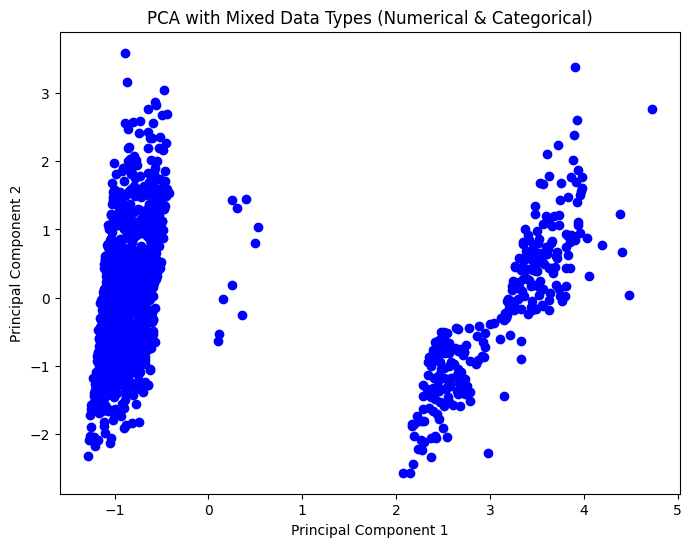

In [385]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[0], pca_results[1], c='blue', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Mixed Data Types (Numerical & Categorical)')
plt.show()

In [386]:
pca.column_correlations

component,0,1,2,3
variable,,,,
charges,0.926163,0.128524,0.354548,-0.000000e+00
bmi,0.115183,0.989689,-0.085133,-4.068442e-49
smoker_yes,0.979493,-0.118954,-0.162616,-4.428902e-33
smoker_no,-0.979493,0.118954,0.162616,-4.428902e-33


In [387]:
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.790,69.75%,69.75%
1,1.024,25.61%,95.35%
2,0.186,4.65%,100.00%
3,0.000,0.00%,100.00%


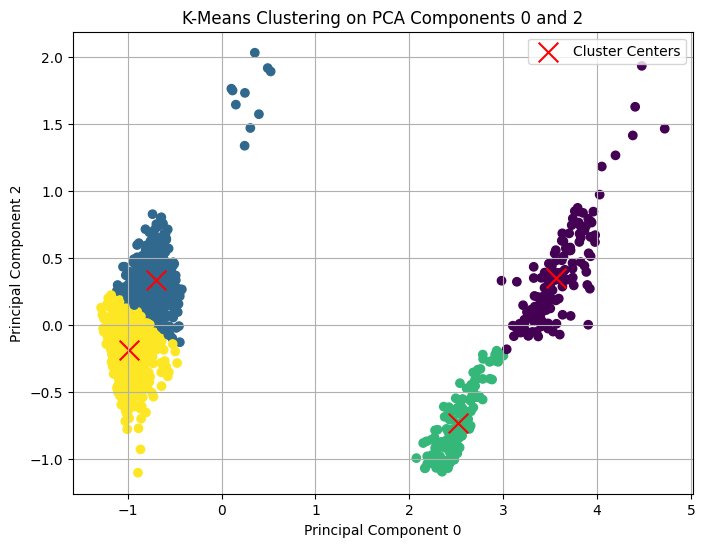

Cluster Labels:  [2 3 3 ... 3 3 2]


In [388]:
from sklearn.cluster import KMeans
pca_0_2 =pca_results.values[:, [0, 2]]
kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_0_2)

# Get the cluster labels
labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_0_2[:, 0], pca_0_2[:, 1], c=labels, cmap='viridis', marker='o')

# Add cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

# Add labels and title
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA Components 0 and 2')
plt.legend()
plt.grid(True)
plt.show()

# Print the cluster labels
print("Cluster Labels: ", labels)

In [389]:
data['clust'] = labels

In [390]:
data.head()

,Unnamed: 0,bmi,charges,charges_norm,smoker_no,smoker_yes,categorie_age_Adulte,categorie_age_Jeune,categorie_age_Sénior,bmi_norm,bmi_log,charges_log,clust
0,0,27.90,16884.9240,0.340179,0,1,0,1,0,-0.440089,3.328627,9.734176,2
1,1,33.77,1725.5523,-0.898456,1,0,0,1,0,0.515114,3.519573,7.453302,3
2,2,33.00,4449.4620,-0.675892,1,0,0,1,0,0.389815,3.496508,8.400538,3
3,3,28.88,3866.8552,-0.723495,1,0,0,1,0,-0.280617,3.363149,8.260197,3
4,4,25.74,3756.6216,-0.732502,1,0,0,1,0,-0.791578,3.248046,8.231275,3


<Axes: xlabel='bmi', ylabel='charges'>

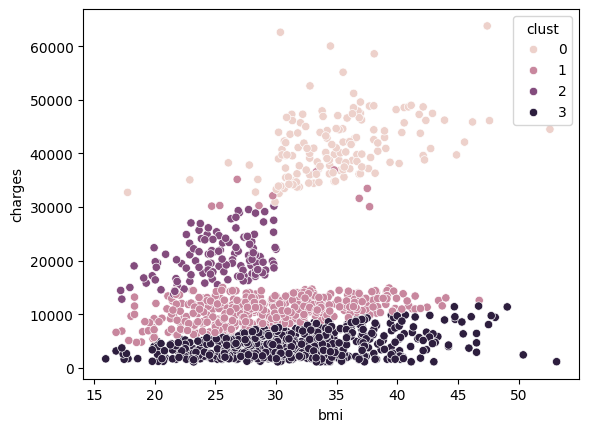

In [391]:
sns.scatterplot(data, x='bmi', y='charges', hue='clust')

In [392]:
import matplotlib.pyplot as plt
import os

def save_all_graphs(folder_path="graphs", file_format="png"):
    """
    Save all open Matplotlib figures to files.

    Parameters:
        folder_path (str): Path to the folder where graphs will be saved.
        file_format (str): Format to save the graphs ('png', 'jpg', 'pdf', etc.).
    """
    # Create folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)
    
    # Get all open figures
    figures = [plt.figure(i) for i in plt.get_fignums()]
    
    # Save each figure
    for i, fig in enumerate(figures, start=1):
        file_name = os.path.join(folder_path, f"graph_{i}.{file_format}")
        fig.savefig(file_name, format=file_format)
        print(f"Saved: {file_name}")
    
    # Optionally close all figures after saving
    plt.close('all')


print(plt.get_fignums())  # Should return a list of figure numbers, e.g., [1, 2]

# Save all graphs
save_all_graphs("output_graphs", "png")


[]
